In [33]:
import yt
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u, constants  as c
from matplotlib.colors import LogNorm

pc = c.pc.cgs.value
kB  = c.k_B.cgs.value
Msun = c.M_sun.cgs.value
G = c.G.cgs.value
Myr = u.Myr.in_units("s")

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "text.latex.preamble" : r'\boldmath'
})



In [34]:
ds = yt.load("sim-files/SILCC_hdf5_plt_cnt_1080")
ctr = [-80*pc, -150*pc, 0*pc]

yt : [INFO     ] 2025-02-20 10:34:22,125 Parameters: current_time              = 340597785179995.1
yt : [INFO     ] 2025-02-20 10:34:22,127 Parameters: domain_dimensions         = [8 8 8]
yt : [INFO     ] 2025-02-20 10:34:22,128 Parameters: domain_left_edge          = [-7.715e+20 -7.715e+20 -7.715e+20]
yt : [INFO     ] 2025-02-20 10:34:22,130 Parameters: domain_right_edge         = [7.715e+20 7.715e+20 7.715e+20]
yt : [INFO     ] 2025-02-20 10:34:22,130 Parameters: cosmological_simulation   = 0


In [35]:
dat = np.array(yt.SlicePlot(ds, "z", ("gas","number_density"), center=ctr).data_source.to_frb((500, "pc"), 800)[("gas", "number_density")])


yt : [INFO     ] 2025-02-20 10:34:31,426 xlim = -1018354206519309369344.000000 524645793480690630656.000000
yt : [INFO     ] 2025-02-20 10:34:31,426 ylim = -1234351637223705149440.000000 308648362776294916096.000000
yt : [INFO     ] 2025-02-20 10:34:31,427 xlim = -1018354206519309369344.000000 524645793480690630656.000000
yt : [INFO     ] 2025-02-20 10:34:31,427 ylim = -1234351637223705149440.000000 308648362776294916096.000000
yt : [INFO     ] 2025-02-20 10:34:31,428 Making a fixed resolution buffer of (('gas', 'number_density')) 800 by 800


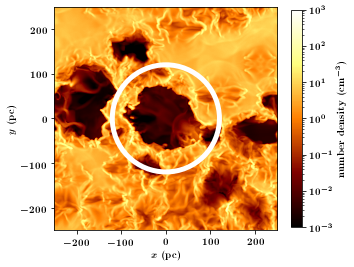

In [37]:
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(dat, origin="lower", extent=[-250,250,-250,250], norm=LogNorm(vmin=1e-3, vmax=1e3), cmap="afmhot")
circle1 = plt.Circle((0,0), 120, color='w', fill=False, lw=5)
ax.add_patch(circle1)
ax.set_xlabel("$x~\\mathrm{(pc)}$")
ax.set_ylabel("$y~\\mathrm{(pc)}$")
cbar = plt.colorbar(im, label="\\textbf{number density }$(\\mathrm{cm}^{-3})$", shrink=0.8)
fig.savefig("plots/illustration-box-and-bubble.pdf", bbox_inches="tight")